# Part 1
Retrieving all the libraries we will need for this project

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 2
Extracting the CSV file and visualizing the DataFrame

In [3]:
weather = pd.read_csv("weatherAUS.csv")
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Part 3
Plotting the temperature in Canberra over almost a decade

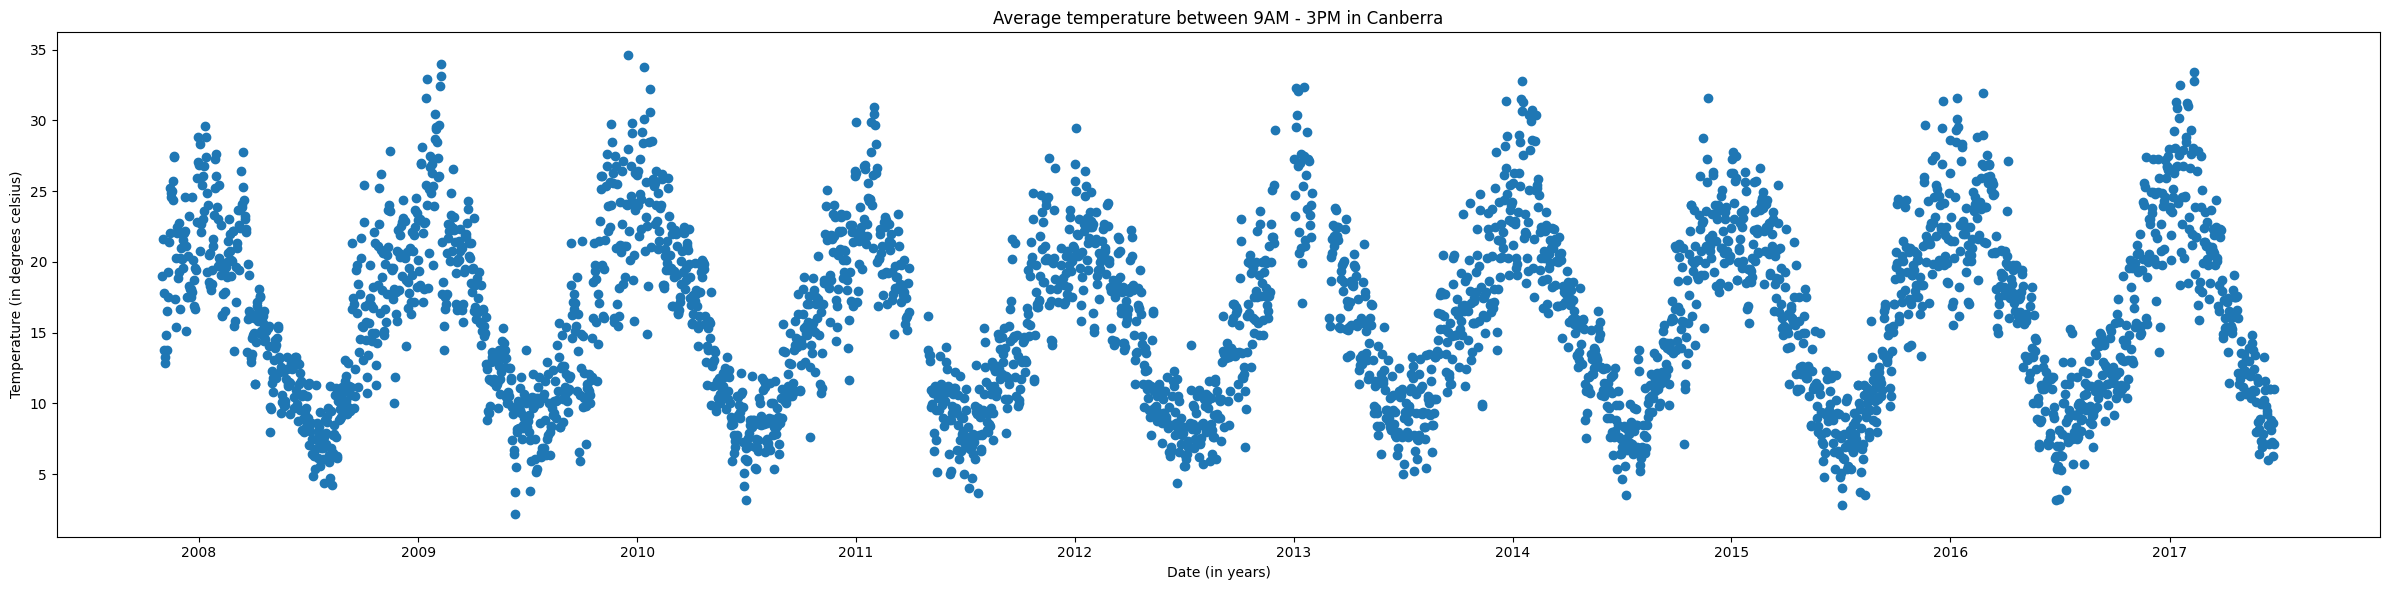

In [4]:
weather['Date'] = pd.to_datetime(weather['Date']) # Ensure that operations on dates can easily be done
location = 'Canberra' # Specify the location
filtered_weather = weather[weather['Location'] == location].loc[:, ['Date', 'Temp9am', 'Temp3pm']] # Filter the dataset by the location and only retrieve important columns
filtered_weather['AverageTemp'] = (filtered_weather['Temp9am'] + filtered_weather['Temp3pm']) / 2 # Add average temperature during the day

### Plot the new dataset ###
plt.figure(figsize=(24, 6))
plt.scatter(filtered_weather['Date'], filtered_weather['AverageTemp'])
plt.title(f'Average temperature between 9AM - 3PM in {location}')
plt.xlabel('Date (in years)')
plt.ylabel('Temperature (in degrees celsius)')
plt.tight_layout()
plt.show()

# Part 4
Plotting month by temperature for the year 2015-2016

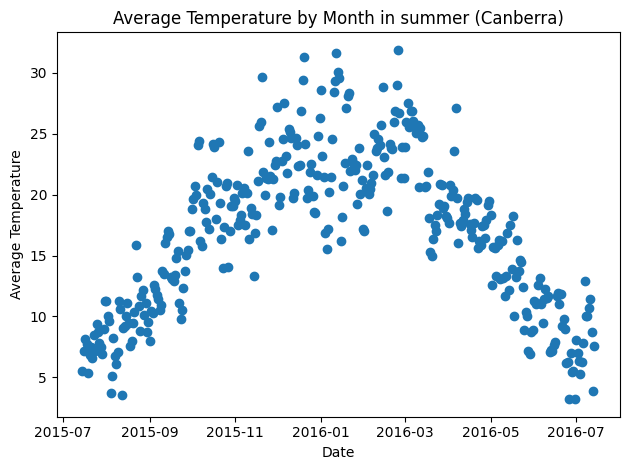

In [5]:
# Assuming filtered_weather is your dataframe and it has a 'Date' column in datetime format
filtered_weather['Month'] = filtered_weather.Date.dt.month
filtered_weather['Year'] = filtered_weather.Date.dt.year
filtered_weather['Day'] = filtered_weather.Date.dt.day

# Filter out unnecessary columns
filtered_weather = filtered_weather.drop(columns=['Temp9am', 'Temp3pm'])

# Define the custom date range
start_date = "2015-7-15"
end_date = "2016-7-14"

filtered_weather = filtered_weather[(filtered_weather['Date'] >= start_date) & (filtered_weather['Date'] <= end_date)]

### Plot the new dataset ###
plt.scatter(filtered_weather.Date, filtered_weather.AverageTemp)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title(f'Average Temperature by Month in summer ({location})')
plt.tight_layout()
plt.show()


# Part 5
Polynomial analysis using matrix multiplication

$$ X = [x^0,\ x^1,\ x^2]\ \text{where}\ x^1\ \text{is the main dataset (dates)} $$
$$ 
\text{Coefficients of our polynomial equation}: (X^TX)^{-1}X^TY = \begin{bmatrix}
                    c_0 \\
                    c_1 \\
                    c_2
                  \end{bmatrix}
$$
$$
Y_{pred} = c_0 + c_1x + c_2x^2
$$


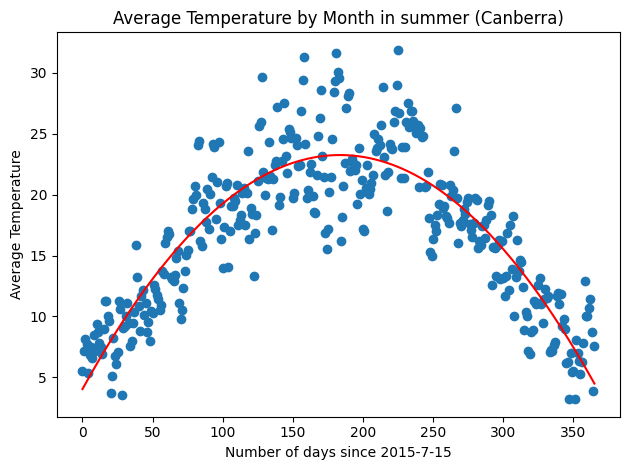

The correlation between the data and the predicted polynomial regression model is 77.38%


In [6]:
from numpy import linalg 

first_day = filtered_weather['Date'].iloc[0]
filtered_weather['DateRange'] = filtered_weather.Date.map(lambda d: (d - first_day).days).astype(int)

Y = filtered_weather.AverageTemp.to_numpy().reshape(-1, 1)
X = filtered_weather.DateRange.to_numpy().reshape(-1, 1)

X_0 = np.power(X, 0)
X_1 = X
X_2 = np.power(X, 2)

combined_X = np.hstack((X_0, X_1, X_2))

coeffs = linalg.inv(combined_X.T @ combined_X) @ (combined_X.T @ Y)
y_pred = coeffs[0] + (coeffs[1] * X) + (coeffs[2] * np.power(X, 2))

### Plot the dataset with the estimated parabol ###
plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')
plt.xlabel(f'Number of days since {first_day.year}-{first_day.month}-{first_day.day}')
plt.ylabel('Average Temperature')
plt.title(f'Average Temperature by Month in summer ({location})')
plt.tight_layout()
plt.show()


SST = np.sum(np.square(Y - np.mean(Y)))
SSE_pred = np.sum(np.square(Y - y_pred))
R2_pred = (1 - (SSE_pred / SST)) * 100
print(f'The correlation between the data and the predicted polynomial regression model is {R2_pred:.2f}%')


As we can see, our polynomial regression model fits the data, but it appears to be underfitting the highest temperatures. In the next part, we will train a model using Stochastic Gradient Descent (SGD) and regularization to find the optimal parameter that allows our regression to fit the data more accurately.

# Part 6
We try to train a model using SDG so it can go toe-to-toe with the the polynomial regression we just did. Right after, we will make further measurements to see if the model does indeed equals the previous one or beat it.

2024-09-04 20:48:45.883696: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-04 20:48:46.002099: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-04 20:48:46.321067: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-04 20:48:46.768238: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-04 20:48:47.704366: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-04 20:48:49.774725: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-04 20:48:53.536823: I tensorflow/core/framework/local_rendezvous.cc:404] L

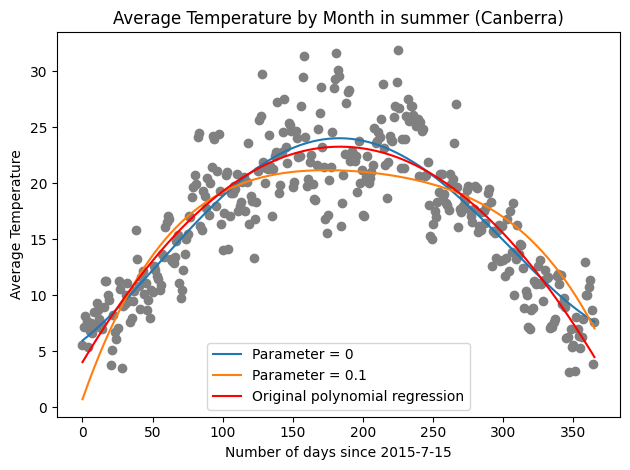

In [7]:
X = X.flatten()
Y = Y.flatten()

# Parameters
learning_rate = 0.001
training_epochs = 400
params = [0, 0.1]
num_coeffs = 5

# Normalize the datasets
x_mean, x_std = np.mean(X), np.std(X)
y_mean, y_std = np.mean(Y), np.std(Y)
x_dataset = (X - x_mean) / x_std
y_dataset = (Y - y_mean) / y_std

train_dataset = tf.data.Dataset.from_tensor_slices((x_dataset, y_dataset)).batch(1)

# Our polynomial model that will optimize the weights
class PolynomialModel(tf.Module):
    def __init__(self):
        weights = tf.zeros(num_coeffs, dtype=tf.float64)
        self.w = tf.Variable(weights, dtype=tf.float64, name='parameters')

    def __call__(self, x):
        terms = []
        for i in range(num_coeffs):
            term = tf.multiply(self.w[i], tf.math.pow(tf.cast(x, tf.float64), i))
            terms.append(term)
        
        return tf.add_n(terms)
    
# Training the model
@tf.function
def train_step(x, y, param, optimizer, model):
    x = tf.cast(x, tf.float64)
    y = tf.cast(y, tf.float64)
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = tf.reduce_mean(tf.square(y - y_pred)) + param * tf.reduce_sum(tf.square(model.w))
    gradients = tape.gradient(loss, [model.w])
    optimizer.apply_gradients(zip(gradients, [model.w]))
    return loss

#  Initialize arrays to store learned values and coefficients
y_learned_by_param = []
equations_coeffs = []

# Iterate over different parameter values
for param in params:
    model = PolynomialModel()

    optimizer = tf.optimizers.SGD(learning_rate)  # Defining the optimizer
    
    # Training loop
    for epoch in range(training_epochs):
        for x, y in train_dataset:
            loss = train_step(x, y, param, optimizer, model)

    w_val = model.w.numpy()
    y_learned = np.zeros_like(x_dataset, dtype=np.float64)
    for i in range(num_coeffs):
        y_learned += w_val[i] * np.power(x_dataset, i)
    
    y_learned = y_learned * y_std + y_mean # Denormalize y_learned

    equations_coeffs.append(w_val) # Add separate array of the coeffs
    y_learned_by_param.append(y_learned)
    # Plotting the results for the current parameter
    plt.plot(X, y_learned, label=f'Parameter = {param}')  # We do not want to plot the data with the normalized data

# Adding plot information
plt.scatter(X, Y, color='grey')  # We do not want to scatter the data with the normalized data
plt.plot(X, y_pred, label='Original polynomial regression', color='red') # Original regression
plt.legend()
plt.xlabel(f'Number of days since {first_day.year}-{first_day.month}-{first_day.day}')
plt.ylabel('Average Temperature')
plt.title(f'Average Temperature by Month in summer ({location})')
plt.tight_layout()
plt.show()


# Part 7
Calculating the correlation between the data and plotting the residuals cloud
$$
Y_{learned} = c_0 + c_1x + c_2x^2 + c_3x^3 + c_4x^4 + \varepsilon
$$
with $\varepsilon\sim\mathcal{N}(0,\sigma^2)$

The correlation between the data and the learned polynomial regression model with parameter 0 is 78.35%
The correlation between the data and the learned polynomial regression model with parameter 0.1 is 68.44%


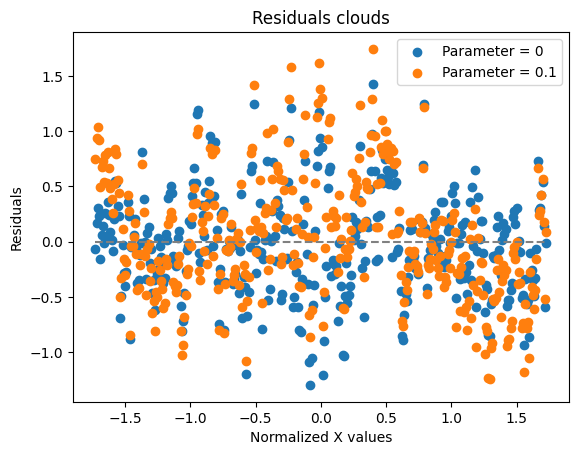

In [8]:
fig, ax = plt.subplots()

for i in range(len(params)):
    SSE_learned = np.sum(np.square(Y - y_learned_by_param[i]))
    R2_learned = (1 - (SSE_learned / SST)) * 100
    print(f'The correlation between the data and the learned polynomial regression model with parameter {params[i]} is {R2_learned:.2f}%')

    residuals = y_dataset - (equations_coeffs[i][0] +
                    equations_coeffs[i][1] * x_dataset +
                    equations_coeffs[i][2] * np.power(x_dataset, 2) +
                    equations_coeffs[i][3] * np.power(x_dataset, 3) +
                    equations_coeffs[i][4] * np.power(x_dataset, 4))
    
    ax.scatter(x_dataset, residuals, label=f'Parameter = {params[i]}')


ax.hlines(xmin=np.min(x_dataset),xmax=np.max(x_dataset),y=0,color="gray",linestyle="--")
plt.xlabel('Normalized X values')
plt.ylabel('Residuals')
plt.title('Residuals clouds')
plt.legend()
plt.show()

We can clearly observe that as the regularization parameter increases, the polynomial regression model fits the data less accurately. While experimenting with a different number of coefficients might improve the fit to some extent, it is evident that it will not fundamentally resolve the issue of the model's fitting capability. Despite these limitations, our polynomial regression model with parameter 0 still performs better in predicting the data compared to the model calculated using matrix transposition and inversion. As we can see, regularization is not always the solution if the data has already an homogeneous pattern.